# iPyWidgets

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = (15,10)

In [17]:
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
iris = sns.load_dataset('iris')

In [4]:
def explore(n): 
    display(iris.head(n))
    
interact(explore, n = (5, min(len(iris),60)))

interactive(children=(IntSlider(value=32, description='n', max=60, min=5), Output()), _dom_classes=('widget-in…

<function __main__.explore(n)>

In [5]:
@interact(n = (5, min(len(iris),60)))
def explore(n): 
    display(iris.head(n))

interactive(children=(IntSlider(value=32, description='n', max=60, min=5), Output()), _dom_classes=('widget-in…

In [6]:
def get_accidents(street_name): 
    part1 = 'https://data.fortworthtexas.gov/resource/kr8h-9zxd.json?streetname='
    api_call = part1 + street_name
    return pd.read_json(api_call)

def get_street(street = ['BERRY', 'UNIVERSITY', 'ROSEDALE']): 
    df = get_accidents(street)
    return df.head()
    
_ = interact(get_street) 

interactive(children=(Dropdown(description='street', options=('BERRY', 'UNIVERSITY', 'ROSEDALE'), value='BERRY…

In [7]:
def make_plot(x, y): 
    sns.lmplot(data = iris, x = x, y = y)  
    
_= interact(make_plot, x = iris, y = iris)

interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…

In [8]:
def make_hist(n=5): 
    sns.distplot(iris.petal_length, bins=n)  
    
_= interact(make_hist, n = (5,10))

interactive(children=(IntSlider(value=5, description='n', max=10, min=5), Output()), _dom_classes=('widget-int…

In [9]:
tips = sns.load_dataset('tips')

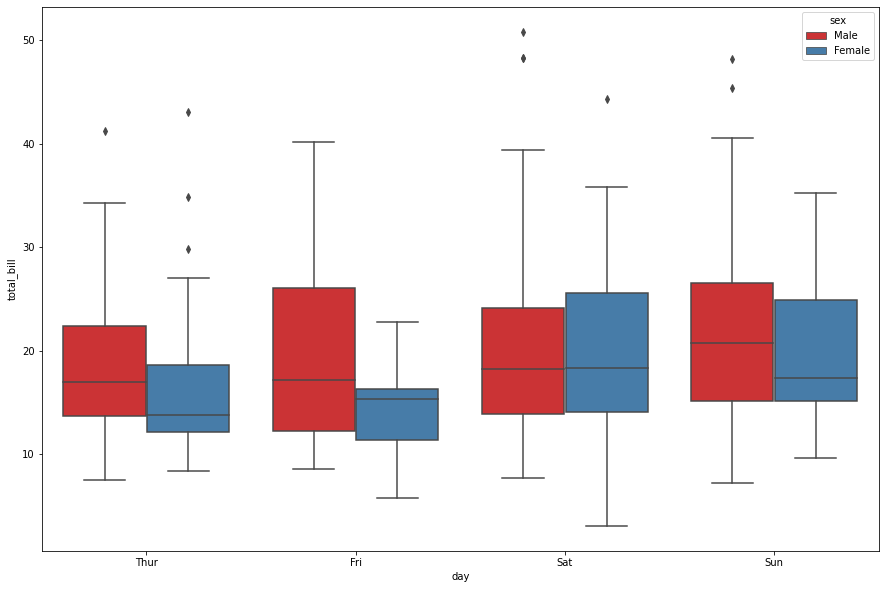

In [10]:
sns.boxplot(x="day", y="total_bill", data=tips, hue='sex',palette='Set1')

In [12]:
@interact
def eda(kind=['box','violin','strip','swarm'], palette=['Set1','Set2']):
    sns.catplot(x="day", y="total_bill", data=tips, hue='sex',palette=palette, kind=kind)

interactive(children=(Dropdown(description='kind', options=('box', 'violin', 'strip', 'swarm'), value='box'), …

In [13]:
penguins = sns.load_dataset('penguins')

In [14]:
def draw(
    attribute,
    plot,
):
    args = {
        'data': penguins,
        'y': attribute,
        'x': 'species'
    }
    if plot == 'Boxplot': sns.boxplot(**args)
    elif plot == 'Pointplot': sns.pointplot(**args)
    elif plot == 'Stripplot': sns.stripplot(**args)

In [19]:
widgets.interact(
    draw,
    attribute=widgets.Dropdown(
        options=[
            col for col in
            penguins.columns if col != 'species'
        ],
        description='Attribute',
    ),
    plot=widgets.ToggleButtons(
        options=['Boxplot', 'Pointplot', 'Stripplot'],
        description='Plot',
    ),
)

interactive(children=(Dropdown(description='Attribute', options=('island', 'bill_length_mm', 'bill_depth_mm', …

<function __main__.draw(attribute, plot)>